Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, KFold ,cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Data Collection and Processing

In [2]:
heart_data = pd.read_csv('heart_disease_data.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.shape

(303, 14)

In [5]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
heart_data.eq(0).sum()

age           0
sex          96
cp          143
trestbps      0
chol          0
fbs         258
restecg     147
thalach       0
exang       204
oldpeak      99
slope        21
ca          175
thal          2
target      138
dtype: int64

In [7]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

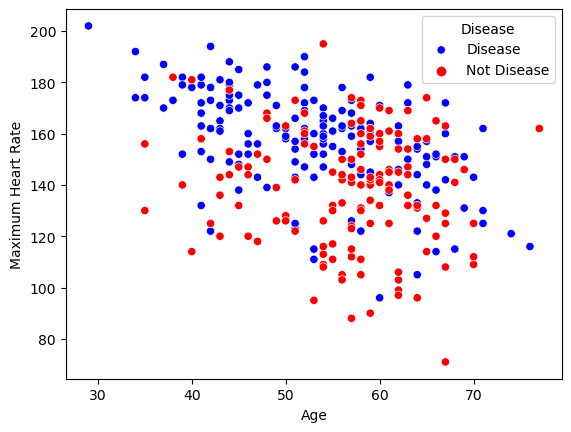

In [9]:
sns.scatterplot(x=heart_data.age, y=heart_data.thalach, hue=heart_data.target, palette=["red", "blue"])
plt.legend(title="Disease", labels=["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

Text(0.5, 1.0, 'target')

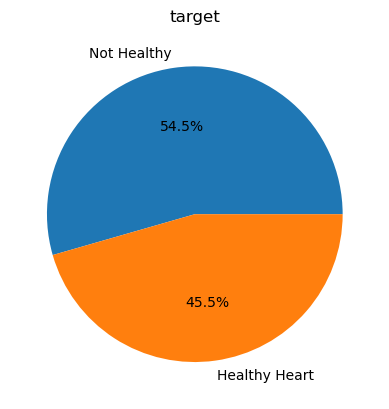

In [10]:
counts = heart_data['target'].value_counts()

# Create a list of labels for the pie chart
labels = ['Not Healthy','Healthy Heart']

# Create a pie chart using the counts and labels
plt.pie(counts.values, labels=labels, autopct='%1.1f%%')

# Add a title to the plot
plt.title('Heart Health')
# Add a title to the plot
plt.title('target')

In [11]:
counts.values

array([165, 138], dtype=int64)

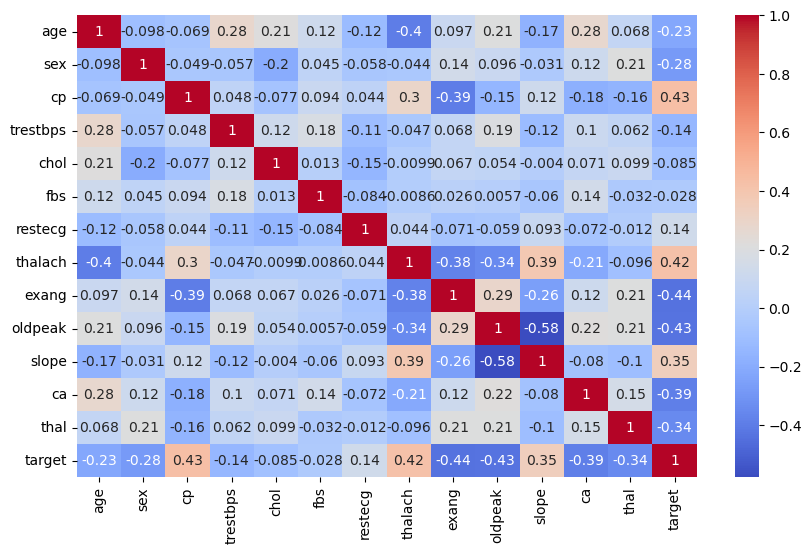

In [12]:
cm=heart_data.corr()
plt.figure(figsize=(10, 6))

# Create a heatmap of the correlation matrix
sns.heatmap(cm, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

In [13]:
# Calculate the correlation coefficients between the target variable and all other variables
corr_matrix = heart_data.corr()
target_corr = corr_matrix['target']

# Select the variables with low correlation with the target variable
low_corr_vars = target_corr[target_corr.abs() < 0.2].index

# Display the variables with low correlation with the target variable
print(low_corr_vars)

Index(['trestbps', 'chol', 'fbs', 'restecg'], dtype='object')


In [14]:
a = pd.get_dummies(heart_data['cp'], prefix = "cp")
b = pd.get_dummies(heart_data['thal'], prefix = "thal")
c = pd.get_dummies(heart_data['slope'], prefix = "slope")

In [15]:
frames = [heart_data, a, b, c]
heart_data = pd.concat(frames, axis = 1)
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [16]:
heart_data = heart_data.drop(columns = ['cp', 'thal', 'slope'])
heart_data.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [17]:
heart_data.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,0.729373,...,0.165017,0.287129,0.075908,0.006601,0.059406,0.547855,0.386139,0.069307,0.462046,0.468647
std,9.082101,0.466011,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,1.022606,...,0.371809,0.453171,0.265288,0.081110,0.236774,0.498528,0.487668,0.254395,0.499382,0.499842
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#Select the columns you want to scale
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach']

# Create a new DataFrame with only those columns
df_scaled = heart_data[cols_to_scale]

# Scale the data in those columns
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

# Replace the original columns in the original DataFrame with the scaled columns
heart_data[cols_to_scale] = df_scaled

In [19]:
heart_data.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
count,3.030000e+02,303.000000,3.030000e+02,3.030000e+02,303.000000,303.000000,3.030000e+02,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,5.825923e-17,0.683168,-7.146832e-16,-9.828955e-17,0.148515,0.528053,-5.203025e-16,0.326733,1.039604,0.729373,...,0.165017,0.287129,0.075908,0.006601,0.059406,0.547855,0.386139,0.069307,0.462046,0.468647
std,1.001654e+00,0.466011,1.001654e+00,1.001654e+00,0.356198,0.525860,1.001654e+00,0.469794,1.161075,1.022606,...,0.371809,0.453171,0.265288,0.081110,0.236774,0.498528,0.487668,0.254395,0.499382,0.499842
min,-2.797624e+00,0.000000,-2.148802e+00,-2.324160e+00,0.000000,0.000000,-3.439267e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,0.000000,-6.638668e-01,-6.814943e-01,0.000000,0.000000,-7.061105e-01,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.988599e-02,1.000000,-9.273778e-02,-1.210553e-01,0.000000,1.000000,1.466343e-01,0.000000,0.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,7.316189e-01,1.000000,4.783913e-01,5.456738e-01,0.000000,1.000000,7.151309e-01,1.000000,1.600000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,2.496240e+00,1.000000,3.905165e+00,6.140401e+00,1.000000,2.000000,2.289429e+00,1.000000,6.200000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Splitting the Features and Target

In [20]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [21]:
print(X)

          age  sex  trestbps      chol  fbs  restecg   thalach  exang  \
0    0.952197    1  0.763956 -0.256334    1        0  0.015443      0   
1   -1.915313    1 -0.092738  0.072199    0        1  1.633471      0   
2   -1.474158    0 -0.092738 -0.816773    0        0  0.977514      0   
3    0.180175    1 -0.663867 -0.198357    0        1  1.239897      0   
4    0.290464    0 -0.663867  2.082050    0        1  0.583939      1   
..        ...  ...       ...       ...  ...      ...       ...    ...   
298  0.290464    0  0.478391 -0.101730    0        1 -1.165281      1   
299 -1.033002    1 -1.234996  0.342756    0        1 -0.771706      0   
300  1.503641    1  0.706843 -1.029353    1        1 -0.378132      0   
301  0.290464    1 -0.092738 -2.227533    0        1 -1.515125      1   
302  0.290464    0 -0.092738 -0.198357    0        0  1.064975      0   

     oldpeak  ca  ...  cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  \
0        2.3   0  ...     0     0     1       0 

In [22]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [24]:
print(X.shape, X_train.shape, X_test.shape)

(303, 21) (242, 21) (61, 21)


Model Training

In [25]:
clf= LogisticRegression()

clf.fit(X_train, y_train)

LogisticRegression()

In [26]:
accuracy = clf.score(X_train, y_train)
print(accuracy)

0.8636363636363636


In [27]:
# Generate a confusion report
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        28
           1       0.93      0.82      0.87        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



In [28]:
y_pred_train=clf.predict(X_train)

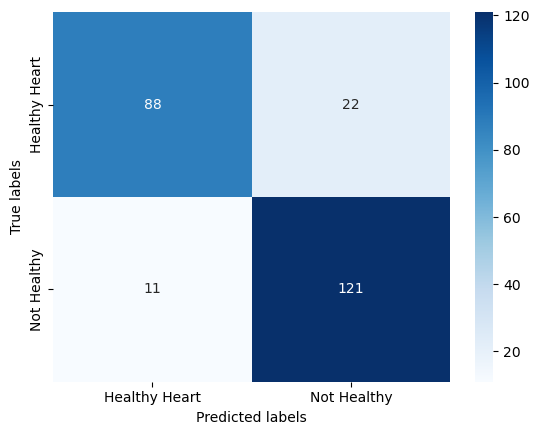

In [29]:
# Generate a confusion matrix
cm = confusion_matrix(y_train, y_pred_train)

# Plot the confusion matrix as a heatmap
labels = ['Healthy Heart','Not Healthy']

sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [30]:
# Create a pipeline with a scaler and an SVM model
svm = SVC(kernel='rbf', C=1.0, gamma='scale')

# Fit the pipeline to the training data
svm.fit(X_train, y_train)

# Predict the output for the test data
y_pred = svm.predict(X_test)

In [31]:
svm.score(X_train, y_train)

0.9049586776859504

In [32]:
svm.score(X_test, y_test)

0.8032786885245902

In [33]:
# Create a Decision Tree classifier
tree = DecisionTreeClassifier()

# Compute the cross-validated score for the iris dataset
scores = cross_val_score(tree, X_train, y_train, cv=10)

# Print the mean and standard deviation of the scores
print("Accuracy: {:.2f} ".format(scores.mean()))

Accuracy: 0.73 


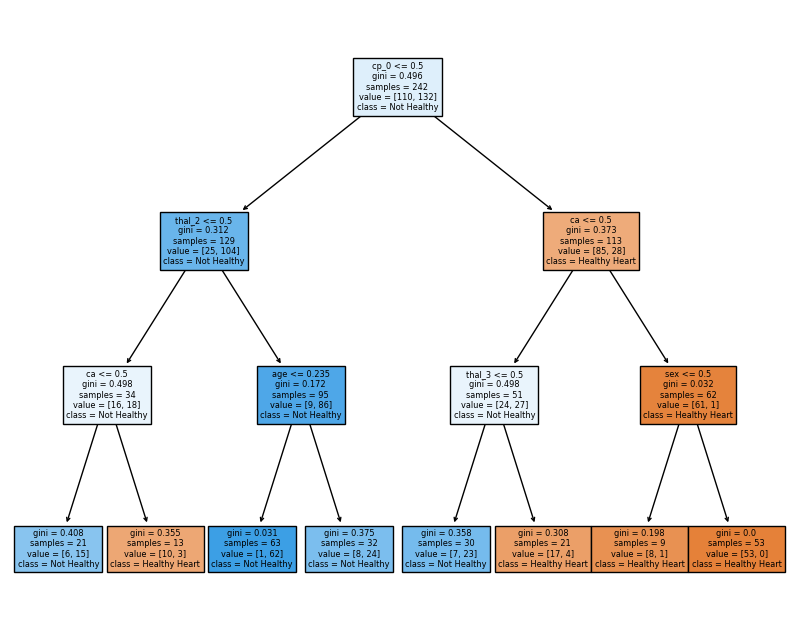

0.8760330578512396

In [34]:
dt_clf = DecisionTreeClassifier(max_depth=3)

dt_clf.fit(X_train, y_train)

plt.figure(figsize=(10,8))
plot_tree(dt_clf, feature_names=X_train.columns, class_names=labels, filled=True)
plt.show()
dt_clf.score(X_train, y_train)

In [35]:
y_pred_tree=dt_clf.predict(X_train)

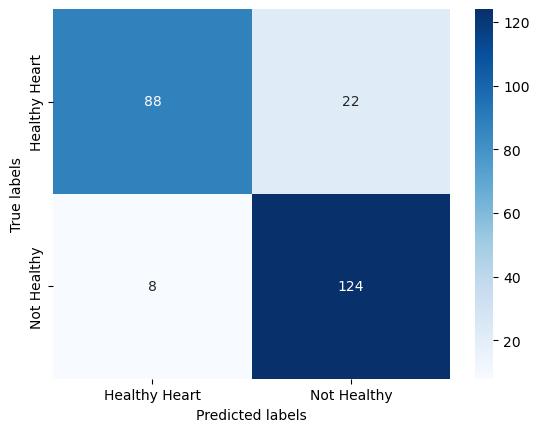

In [36]:
# Generate a confusion matrix for the predictions
cm_tree = confusion_matrix(y_train, y_pred_tree)


# Plot the confusion matrix as a heatmap
sns.heatmap(cm_tree, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()